# 羅吉斯回歸(Logistic Regression)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

# Sigmoid Function

In [2]:
def sigmoid(s):
    return(1/(1+np.exp(-s)))

##### 我們把sigmoid function畫出來

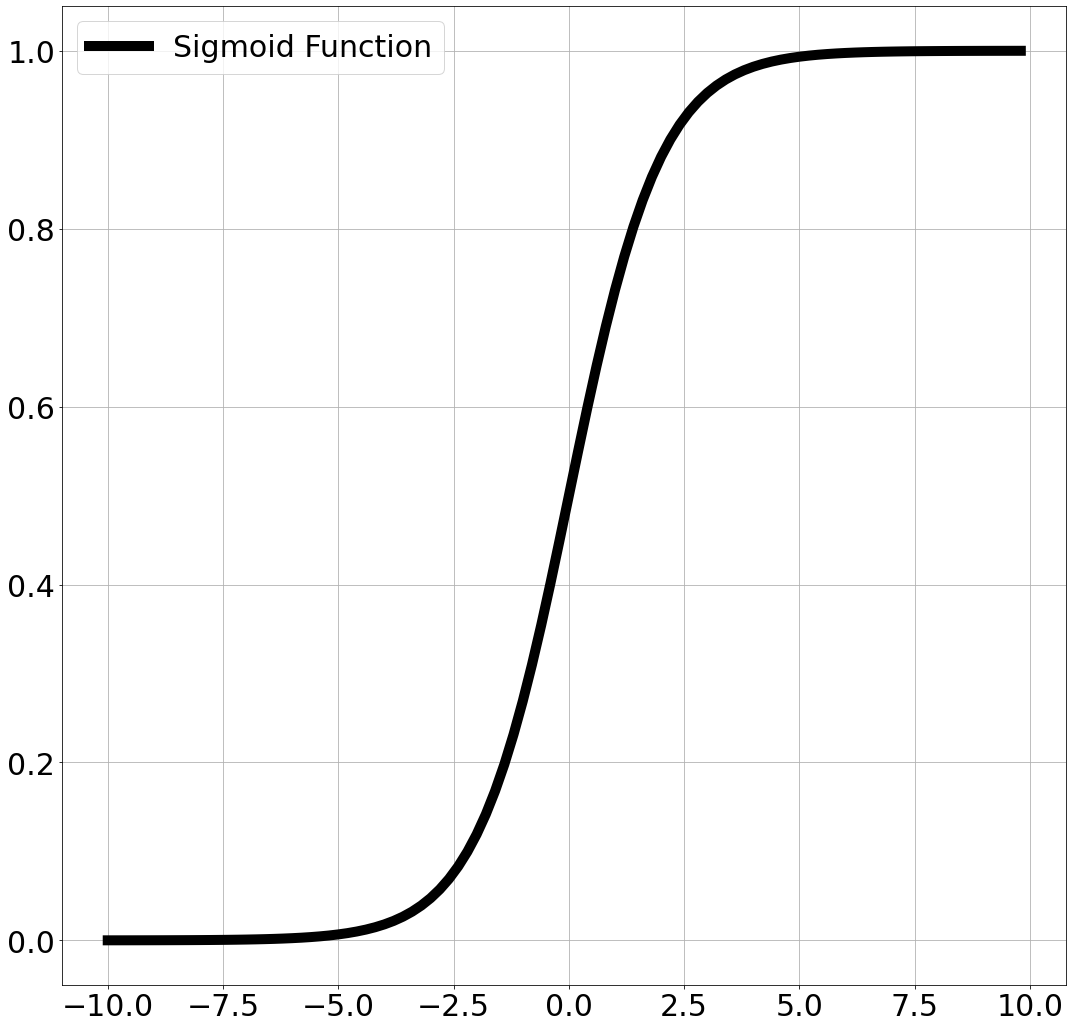

In [3]:
# x有100個點，對應的y有100個點
x=np.zeros(100)
y=np.zeros(100)
# 我們設x從-10到10中切100個點
# 然後帶入sigmoid function
for i in range(0,100):
    x[i]=i/5-10
    y[i]=sigmoid(x[i])
# 視覺化
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x,y,"k-",linewidth=10,label="Sigmoid Function")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc="upper left",fontsize=30)
plt.grid()
plt.show()

##### 和之前的感知器一樣，設定我們有30個點，其中15個是圈圈，15個是叉叉

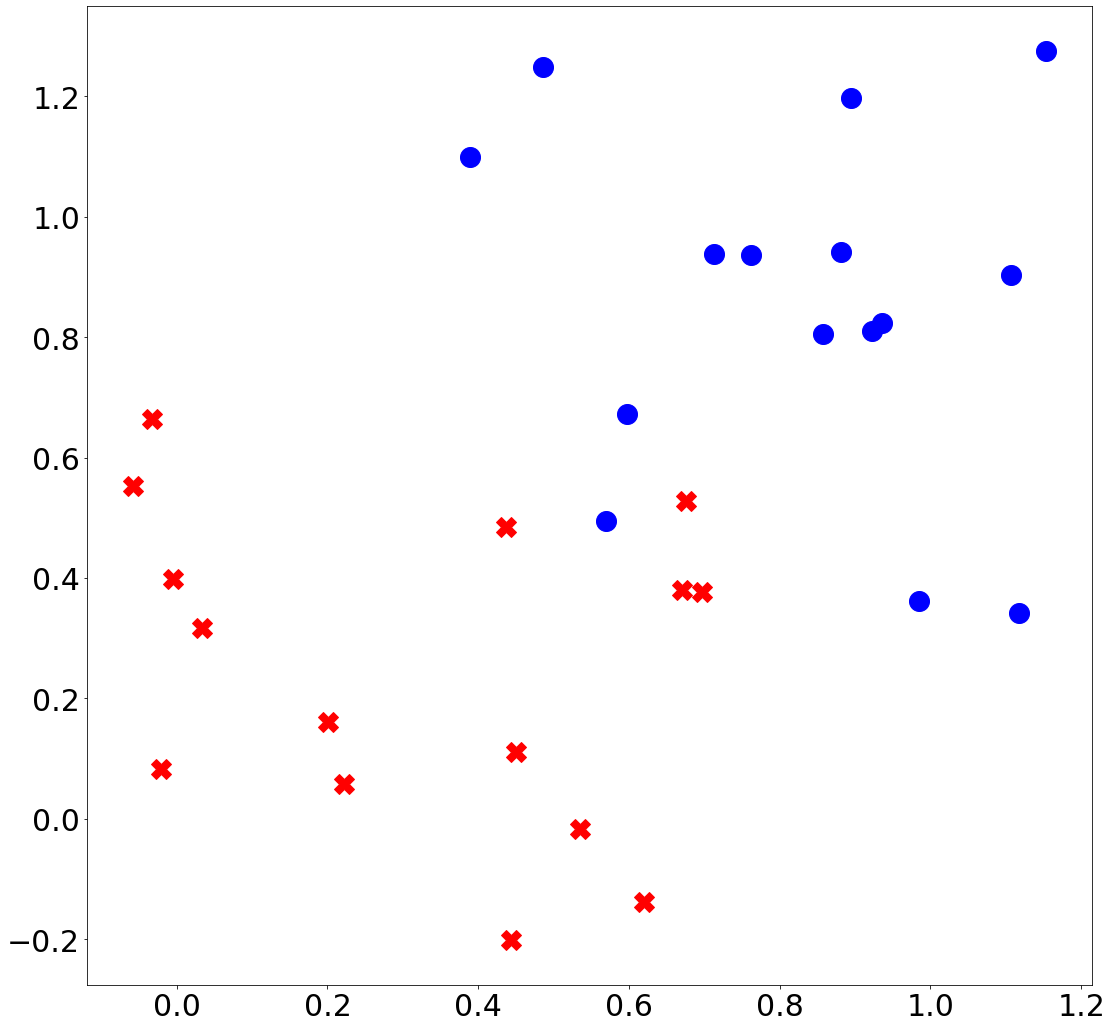

In [4]:
# 這裡我們建立一個30*2的矩陣x
# 30代表我們有30個點，2代表為2維空間(平面)
x=np.zeros((30,2))
# 這裡我們建立一個長度30的向量y
# 用來儲存我們的標記資料是圈圈(+1)還是叉叉(0)
y=np.zeros(30)
# 因為有30筆資料，所以跑30個迴圈
for i in range(0,30): 
    # 標記y前半段0~14為圈圈(+1)，後半段15~29為叉叉(0)
    # 也就是圈圈15個點，叉叉15個點
    f=0.3
    if(i<15):
        y[i]=1
        x[i,0],x[i,1]=random.random()+f,random.random()+f
    else:
        y[i]=0
        x[i,0],x[i,1]=random.random()-f,random.random()-f
    # 這裡我們隨機給定我們資料的位置
    # random.random()就是從0到1隨機產生一個浮點數
    # 而f可以決定我們圈圈和叉叉兩組數據分的越開或是越近
    
# 設定我們輸出圖片的大小
plt.rcParams["figure.figsize"] = (18,18)
#畫出圈圈的點，bo：b代表藍色、o代表圈圈、marksize為大小
plt.plot(x[:15,0],x[:15,1],"bo",markersize=20)
#畫出叉叉的點，rX：r代表紅色、X代表叉叉、marksize為大小
plt.plot(x[15:,0],x[15:,1],"rX",markersize=20)
# 設定x和y軸座標的字體大小
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#畫出來
plt.show()

##### 執行logistic regression

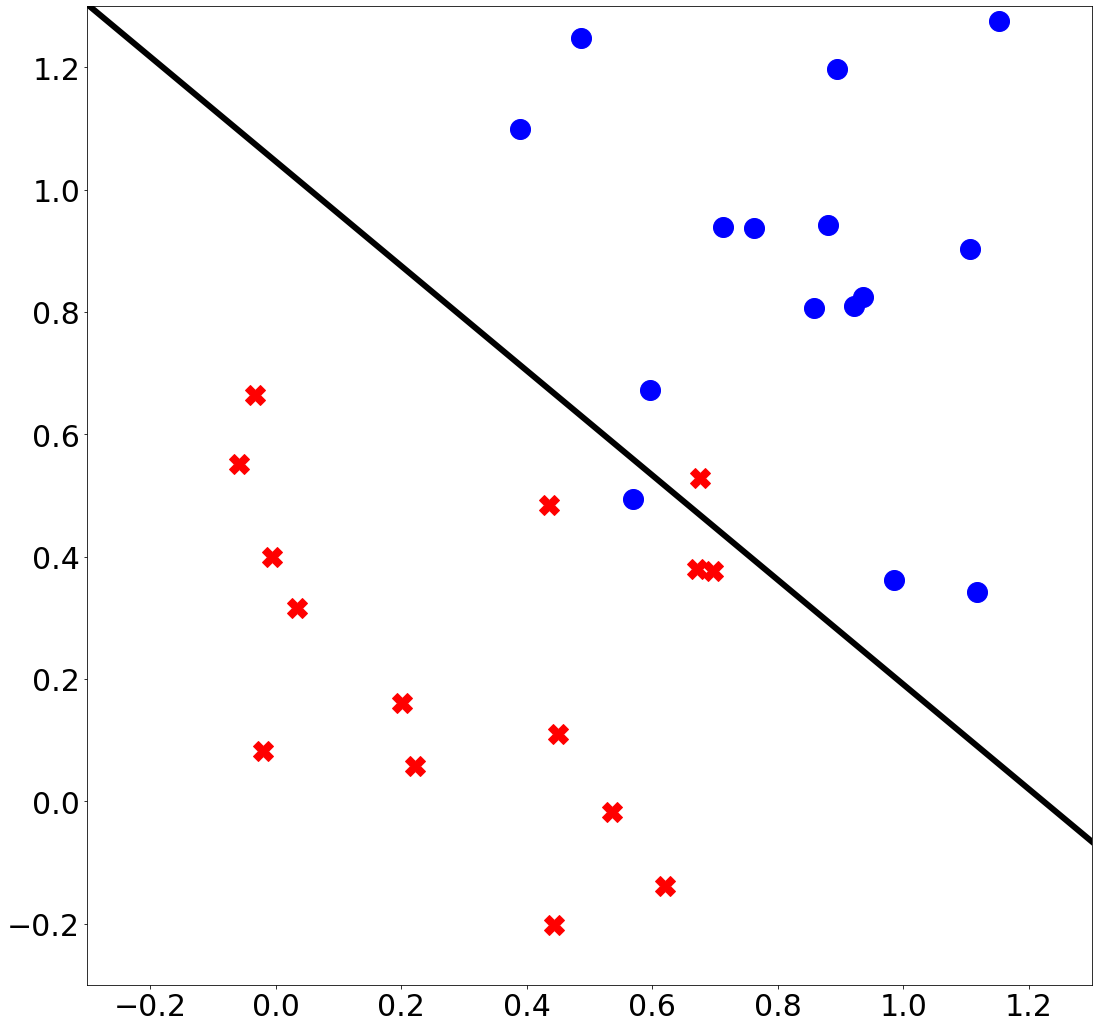

In [5]:
# 設定讓我們的演算法跑1000次
# learning rate設為1
T=1000
a=1
# 建立權重矩陣
w=np.zeros(3)
# 我們分別計算y的平均，x1y的平均，x2y的平均
y_mean=np.mean(y)
x1y_mean=np.mean(x[:,0]*y)
x2y_mean=np.mean(x[:,1]*y)
# 跑迴圈執行演算法
for t in range(0,T):
    # 這裡我們計算h(x)、h(x)*x1、h(x)*x2的平均
    sigmoid_x_mean=0
    sigmoid_xx1_mean=0
    sigmoid_xx2_mean=0
    for i in range(0,30):
        tmp=sigmoid(w[0]+w[1]*x[i,0]+w[2]*x[i,1])
        sigmoid_x_mean+=tmp
        sigmoid_xx1_mean+=tmp*x[i,0]
        sigmoid_xx2_mean+=tmp*x[i,1]
    ln10=np.log(10)
    sigmoid_x_mean/=30
    sigmoid_xx1_mean/=30
    sigmoid_xx2_mean/=30
    # 更新我們的權重
    w[0]=w[0]-a*(sigmoid_x_mean-y_mean)/ln10
    w[1]=w[1]-a*(sigmoid_xx1_mean-x1y_mean)/ln10
    w[2]=w[2]-a*(sigmoid_xx2_mean-x2y_mean)/ln10
# 視覺化
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x[:15,0], x[:15,1],"bo",markersize=20)
plt.plot(x[15:,0], x[15:,1],"rX",markersize=20)
# 這裡是畫出分割線的算法
# 我們知道分割線滿足 w0*x0+w1*x1+w2*x2=0
# 所以 x2=-(w1/w2)*x1-(w0/w2)*x0
# 斜率 = -w1/w2、截距 = -w0/w2
m=-w[1]/w[2]
b=-w[0]/w[2]
plt.plot([-0.3,1.3],[m*-0.3+b,m*1.3+b],"k-",linewidth=6)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# xlim就是限制我們圖輸出的x座標
# ylim就是限制我們圖輸出的y座標
plt.xlim([-0.3,1.3])
plt.ylim([-0.3,1.3])
plt.show()

### 3D 視覺化

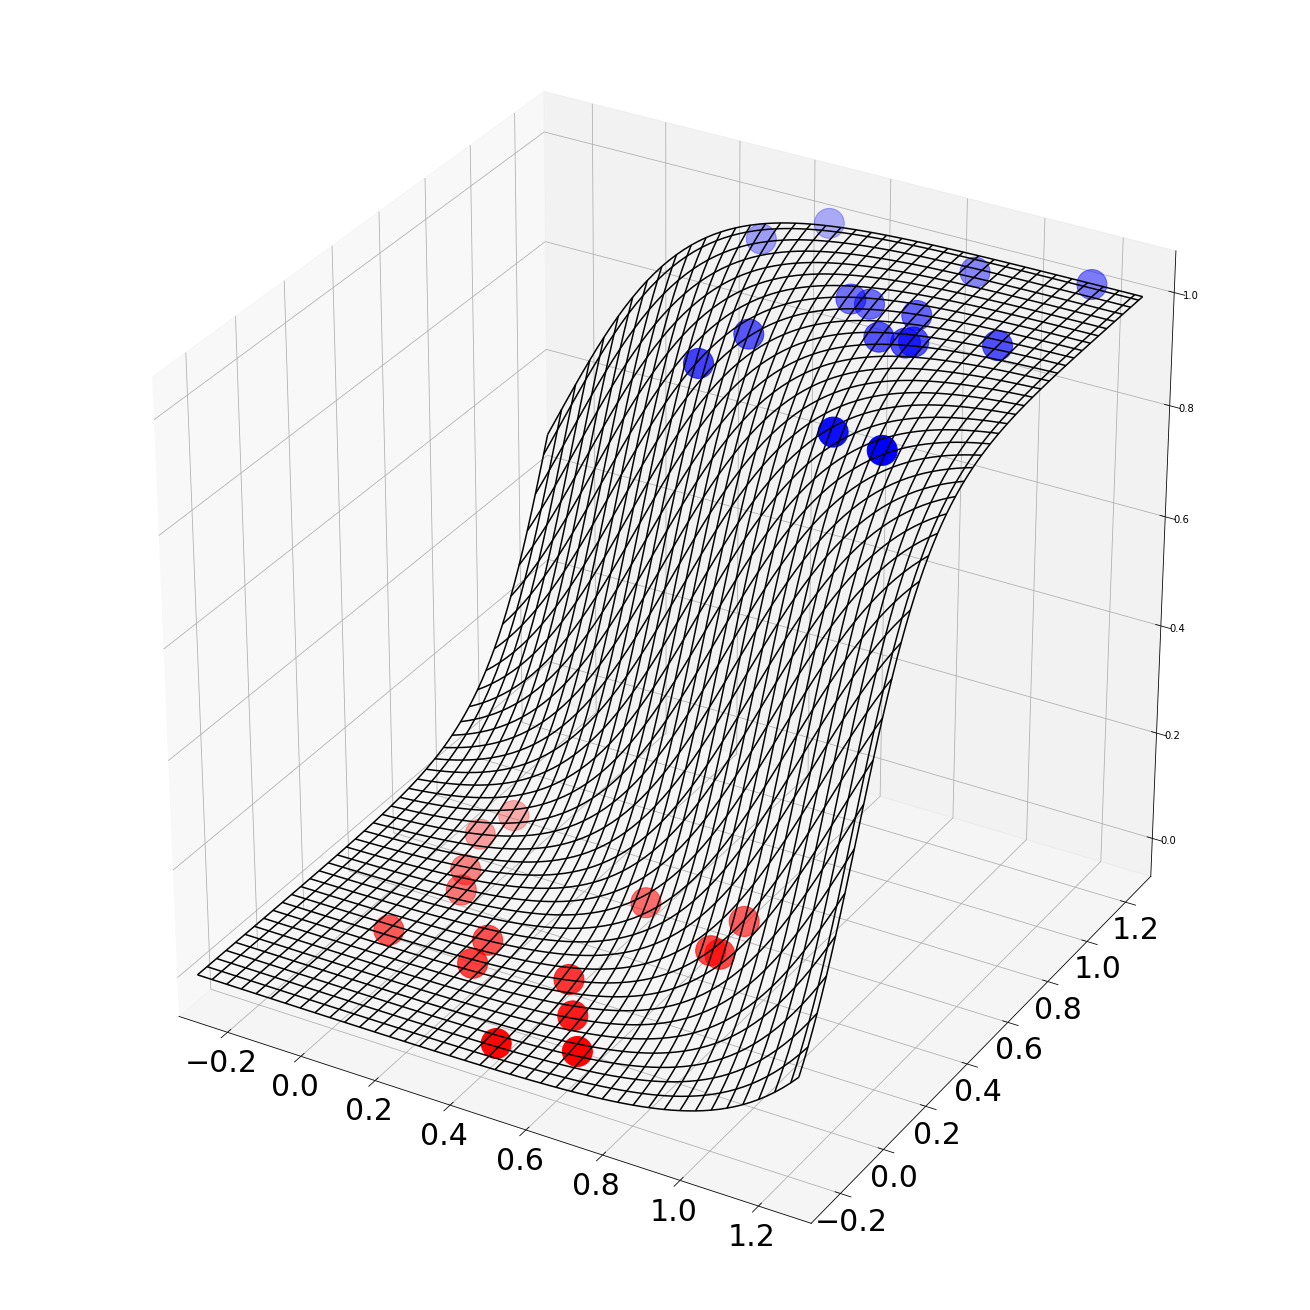

In [9]:
plt.rcParams["figure.figsize"] = (18,18)
fig = plt.figure()
ax = Axes3D(fig)
# 為了畫出我們的sigmoid function
# 我們從-0.3到1.3中間以0.02為區間
# 把數值存入x1和x2，再帶進sigmoid function
plot_x1 = np.arange(-0.3, 1.3, 0.02)
plot_x2 = np.arange(-0.3, 1.3, 0.02)
plot_X1, plot_X2 = np.meshgrid(plot_x1, plot_x2)
plot_Y=sigmoid(w[0]+w[1]*plot_X1+w[2]*plot_X2)
#我們用scatter繪圖方程式把點畫出來
ax.scatter(x[:15,0], x[:15,1], y[:15], c ='blue',s=900)
ax.scatter(x[15:,0], x[15:,1], y[15:], c ='red',s=900)
#我們用plot_wireframe繪圖方程式把sigmoid function畫出來
ax.plot_wireframe(plot_X1, plot_X2, plot_Y, color="black")

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim([-0.3,1.3])
plt.ylim([-0.3,1.3])
#畫出來
plt.show()